# Twitter - @allanspadini 

#Github
https://github.com/allanspadini/INFORUSO_temporais

# Carregando os dados

In [1]:
import pandas as pd

In [2]:
carbonico = pd.read_csv('co2.csv',sep='\t')

In [3]:
carbonico.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [4]:
import seaborn as sns

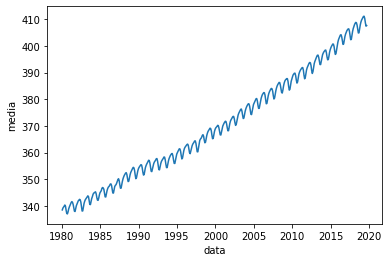

In [5]:
sns.lineplot(x='data', y='media', data=carbonico)

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] =18

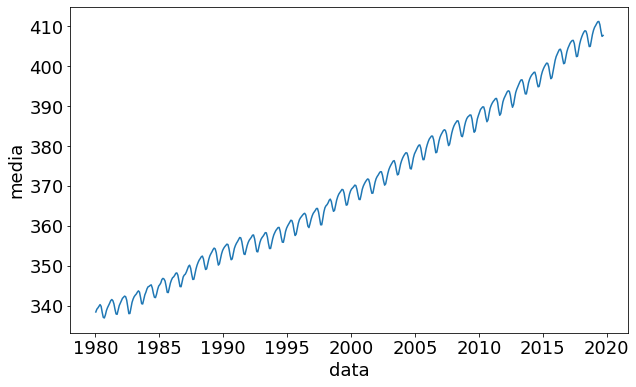

In [7]:
sns.lineplot(x='data', y='media', data=carbonico)

# Divisão em treino e teste

In [8]:
tamanho_treino = int(len(carbonico)*0.7)

In [9]:
carbonico_treino = carbonico.iloc[0:tamanho_treino]

In [10]:
carbonico_teste = carbonico.iloc[tamanho_treino:len(carbonico)]

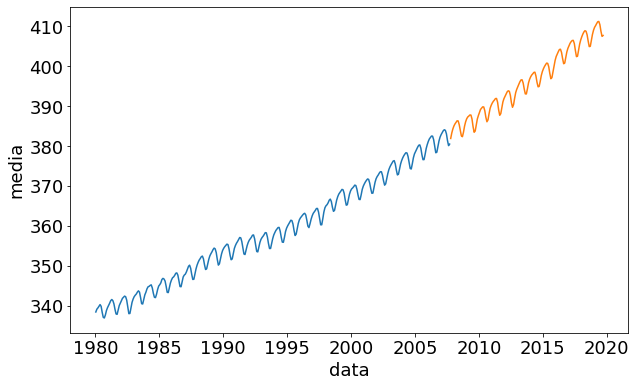

In [11]:
sns.lineplot(x='data', y='media', data=carbonico_treino)
sns.lineplot(x='data', y='media', data=carbonico_teste)

# Aprendendo com o passado

y = ax +b ?

In [12]:
from sklearn import linear_model

In [13]:
modelo_de_regressao = linear_model.LinearRegression()

In [14]:
x_treino = carbonico_treino['data'].index.values.reshape(-1,1)

In [15]:
y_treino = carbonico_treino['media'].values.reshape(-1,1)

In [16]:
modelo_de_regressao.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
modelo_de_regressao.coef_

array([[0.13332277]])

In [18]:
modelo_de_regressao.intercept_

array([336.7537658])

In [19]:
x_teste = carbonico_teste['data'].index.values.reshape(-1,1)

In [20]:
y_predito = modelo_de_regressao.predict(x_teste)

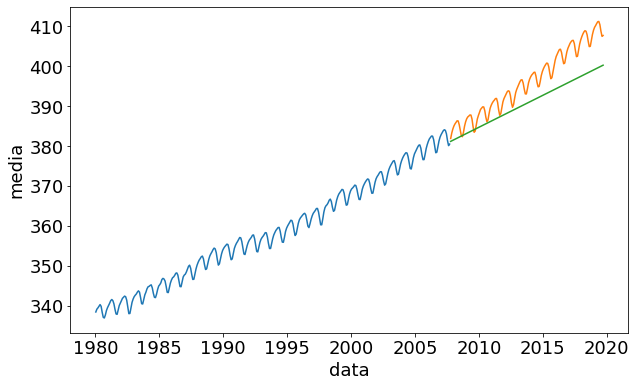

In [21]:
sns.lineplot(x='data', y='media', data=carbonico_treino)
sns.lineplot(x='data', y='media', data=carbonico_teste)
sns.lineplot(x='data', y=y_predito[:,0], data=carbonico_teste)

# ARMA(p,q)

# $ Y_t = \beta_0 + \beta_1 Y_{t-1} + ... + \beta_p Y_{t-p} \\
        \;\;\;\;\;\;\;\; \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t-q}$

# Estacionariedade



*   Tendência
*   Sazonalidade



# ARIMA

In [22]:
!pip install pmdarima

In [23]:
from pmdarima import auto_arima

In [24]:
modelo_arima = auto_arima(y_treino, start_p=0, start_q=0, max_p=3,
                          max_q=3, d=1, D=1, start_Q=1, start_P=1,
                          max_P=4, max_Q=4, m=7, seasonal=True, trace=True,
                          error_action='ignore',
                          suppress_warnings=True, stepwise=False, maxiter=50)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1183.054, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=883.371, Time=0.66 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=774.824, Time=0.98 sec
 ARIMA(0,1,0)(0,1,3)[7]             : AIC=822.864, Time=2.03 sec
 ARIMA(0,1,0)(0,1,4)[7]             : AIC=625.418, Time=11.47 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=975.153, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=832.467, Time=0.95 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=872.154, Time=2.20 sec
 ARIMA(0,1,0)(1,1,3)[7]             : AIC=749.362, Time=6.48 sec
 ARIMA(0,1,0)(1,1,4)[7]             : AIC=624.327, Time=12.51 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=957.272, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=825.419, Time=2.88 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=772.254, Time=3.93 sec
 ARIMA(0,1,0)(2,1,3)[7]             : AIC=736.564, Time=7.78 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=957.836, Time=0.41 sec
 ARIMA(0,1,0)(3,1,1)[7

In [25]:
modelo_arima.fit(y_treino)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(4, 1, 0, 7),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [26]:
previsao_arima = modelo_arima.predict(len(carbonico_teste))

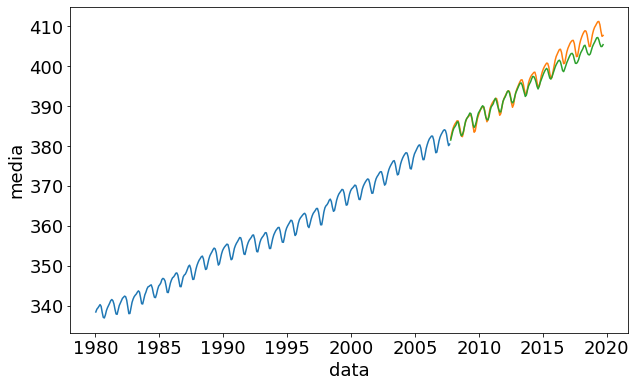

In [27]:
sns.lineplot(x='data', y='media', data=carbonico_treino)
sns.lineplot(x='data', y='media', data=carbonico_teste)
sns.lineplot(x='data', y=previsao_arima, data=carbonico_teste)


# Venda de Carros

In [28]:
carro = pd.read_csv('carros.csv')

In [29]:
carro.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


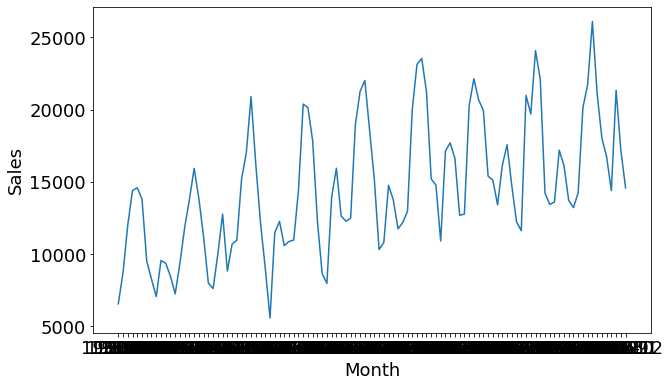

In [30]:
sns.lineplot(x='Month',y='Sales',data=carro)

In [31]:
carro['Month'] = pd.to_datetime(carro['Month'])

In [32]:
carro.columns = ['ds','y']

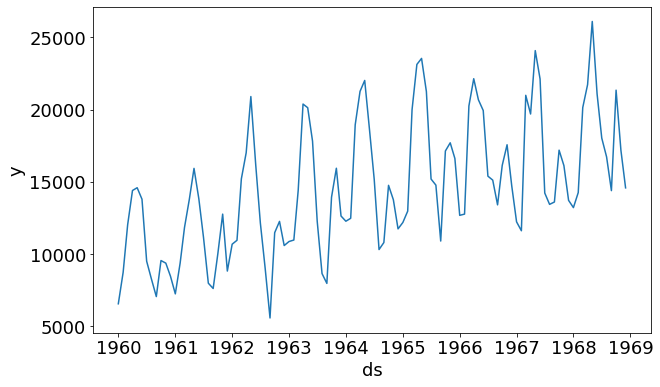

In [33]:
sns.lineplot(x='ds',y='y',data=carro)

In [34]:
tamanho_treino = int(len(carro)*0.7)

In [35]:
carro_treino = carro.iloc[0:tamanho_treino]

In [36]:
carro_teste = carro.iloc[tamanho_treino:len(carro)]

In [37]:
from fbprophet import Prophet

In [46]:
modelo_profeta = Prophet(yearly_seasonality=5)

In [47]:
modelo_profeta.fit(carro_treino)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
resultado_profeta = modelo_profeta.make_future_dataframe(periods=1000)

In [49]:
previsao_profeta = modelo_profeta.predict(resultado_profeta)

In [50]:
previsao_profeta.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9338.046693,4932.065257,7924.681466,9338.046693,9338.046693,-2967.391927,-2967.391927,-2967.391927,-2967.391927,-2967.391927,-2967.391927,0.0,0.0,0.0,6370.654766
1,1960-02-01,9450.260741,5614.681414,8531.042992,9450.260741,9450.260741,-2284.348998,-2284.348998,-2284.348998,-2284.348998,-2284.348998,-2284.348998,0.0,0.0,0.0,7165.911743
2,1960-03-01,9555.235172,10703.697421,13573.854237,9555.235172,9555.235172,2612.470626,2612.470626,2612.470626,2612.470626,2612.470626,2612.470626,0.0,0.0,0.0,12167.705798
3,1960-04-01,9667.449220,13628.872202,16587.522264,9667.449220,9667.449220,5415.645976,5415.645976,5415.645976,5415.645976,5415.645976,5415.645976,0.0,0.0,0.0,15083.095195
4,1960-05-01,9776.043459,14842.135586,17725.200424,9776.043459,9776.043459,6430.774412,6430.774412,6430.774412,6430.774412,6430.774412,6430.774412,0.0,0.0,0.0,16206.817871


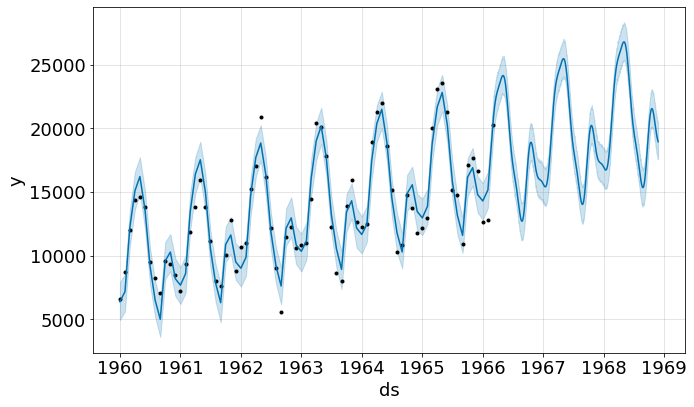

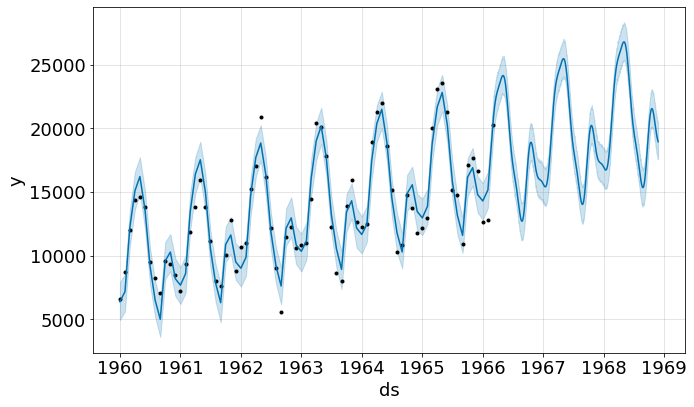

In [51]:
modelo_profeta.plot(previsao_profeta)

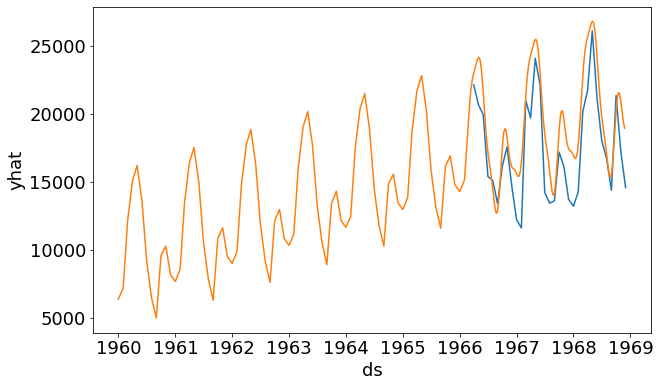

In [52]:
sns.lineplot(x='ds',y='y',data=carro_teste)
sns.lineplot(x='ds',y='yhat',data=previsao_profeta)

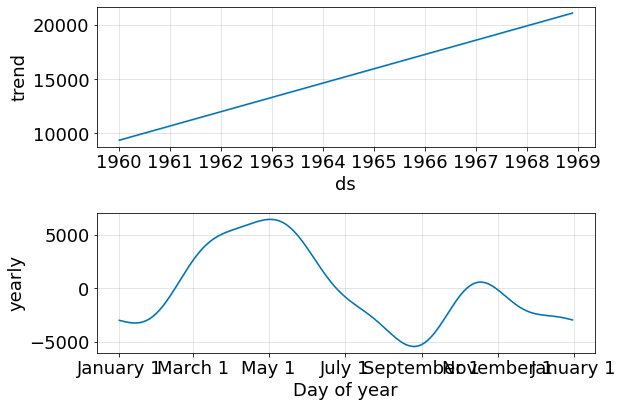

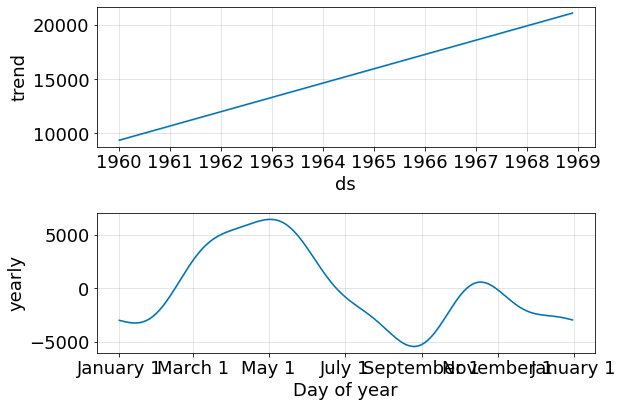

In [53]:
modelo_profeta.plot_components(previsao_profeta)

## $ y(t)= g(t) + s(t) + h(t) + εt $



*   g(t) - curva de crescimento linear ou logístico por partes para modelar mudanças não periódicas em séries temporais
*   s(t) - mudanças periódicas (por exemplo, sazonalidade semanal / anual)
*   h(t) - efeitos de feriados (fornecido pelo usuário) com horários irregulares
*   εt   - o termo de erro é responsável por quaisquer alterações incomuns não acomodadas pelo modelo


